# [**Generating WordClouds in Python Tutorial**](https://www.datacamp.com/tutorial/wordcloud-python)

Learn how to perform Exploratory Data Analysis for Natural Language Processing using WordCloud in Python.

Updated Feb 2023, Duong Vu.

**Disclosure**: This is not work of my property, used it for learning.

## What is a Word Cloud?

Many times you might have seen a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word. This is called a **Tag Cloud** or **word cloud**.

## When to Use a Word Cloud

It's important to remember that while word clouds are useful for visualizing common words in a text or data set, they're usually only useful as a high-level overview of themes. They're similar to bar plots but are often more visually appeling (albeit at times harder to interpret). Word clouds can be particularly helpful when you want to:

- Quickly identify the most **important themes** or **topics** in a alrge body of text
- Understand the **overall sentiment** or tone of a piece of writing
- Explore **patterns** or **trends** in data that contain textual information
- Communicate the **key ideas** or **concepts** in a visually engaging way

## Dataset

This tutorial uses the [**wine review dataset**](https://www.kaggle.com/zynicide/wine-reviews/data) from Kaggle. This collection is a great dataset for learning with no missing values (which will take time to handle) and a lot of text (wine reviews), categorical, and numerical data.

## **Creating a Word Cloud in Python: Preparation**

In [1]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
import os
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### **Load the data into the dataframe**

In [2]:
# Load in the dataframe
df = pd.read_csv('data/winemag-data-130k-v2.csv', index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


You can printout some basic information about the dataset using `print()` combined with `.format()` to have a nice printout.

In [3]:
print(f"There are {df.shape[0]:,} observations and {df.shape[1]} features in this dataset.")
print(f"There are {df.variety.unique().size} types of wine in this dataset such as {', '.join(df.variety.unique()[:5])}...")
print(f"There are {df.country.unique().size} countries producing wine in this dataset such as {', '.join(df.country.unique()[:5])}...")

There are 129,971 observations and 13 features in this dataset.
There are 708 types of wine in this dataset such as White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir...
There are 44 countries producing wine in this dataset such as Italy, Portugal, US, Spain, France...


In [4]:
df[['country', 'description', 'points']].head()

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87
2,US,"Tart and snappy, the flavors of lime flesh and...",87
3,US,"Pineapple rind, lemon pith and orange blossom ...",87
4,US,"Much like the regular bottling from 2012, this...",87


### **Create groups to compare features**

To make comparisons between groups of a feature, you can use `groupby()` and compute summary statistics.

With the wine dataset, you can group by country and look at either the summary statistic for all countries' points and price or select the most popular and expensive ones.

In [5]:
# Groupby by country
country = df.groupby('country')

# Summary statistic of all countries
country.describe().head()

points                                                 \
                         count       mean       std   min    25%   50%    75%   
country                                                                         
Argentina               3800.0  86.710263  3.179627  80.0  84.00  87.0  89.00   
Armenia                    2.0  87.500000  0.707107  87.0  87.25  87.5  87.75   
Australia               2329.0  88.580507  2.989900  80.0  87.00  89.0  91.00   
Austria                 3345.0  90.101345  2.499799  82.0  88.00  90.0  92.00   
Bosnia and Herzegovina     2.0  86.500000  2.121320  85.0  85.75  86.5  87.25   

                                price                                     \
                          max   count       mean        std   min    25%   
country                                                                    
Argentina                97.0  3756.0  24.510117  23.430122   4.0  12.00   
Armenia                  88.0     2.0  14.500000   0.707107  14.0  14.25   
Australia               100.0  2294.0  35.437663  49.049458   5.0  15.00   
Austria                  98.0  2799.0  30.762772  27.224797   7.0  18.00   
Bosnia and Herzegovina   88.0     2.0  12.500000   0.707107  12.0  12.25   

                                             
                         50%    75%     max  
country                                      
Argentina               17.0  25.00   230.0  
Armenia                 14.5  14.75    15.0  
Australia               21.0  38.00   850.0  
Austria                 25.0  36.50  1100.0  
Bosnia and Herzegovina  12.5  12.75    13.0

This selects the top 5 highes average points among all 44 countries:

In [6]:
country.mean().sort_values(by='points', ascending=False).head()

,points,price
country,,
England,91.581081,51.681159
India,90.222222,13.333333
Austria,90.101345,30.762772
Germany,89.851732,42.257547
Canada,89.369650,35.712598


### **Plot the data**

You can plot the number of wines by country using the plot method of Pandas DataFrame and Matplotlib.

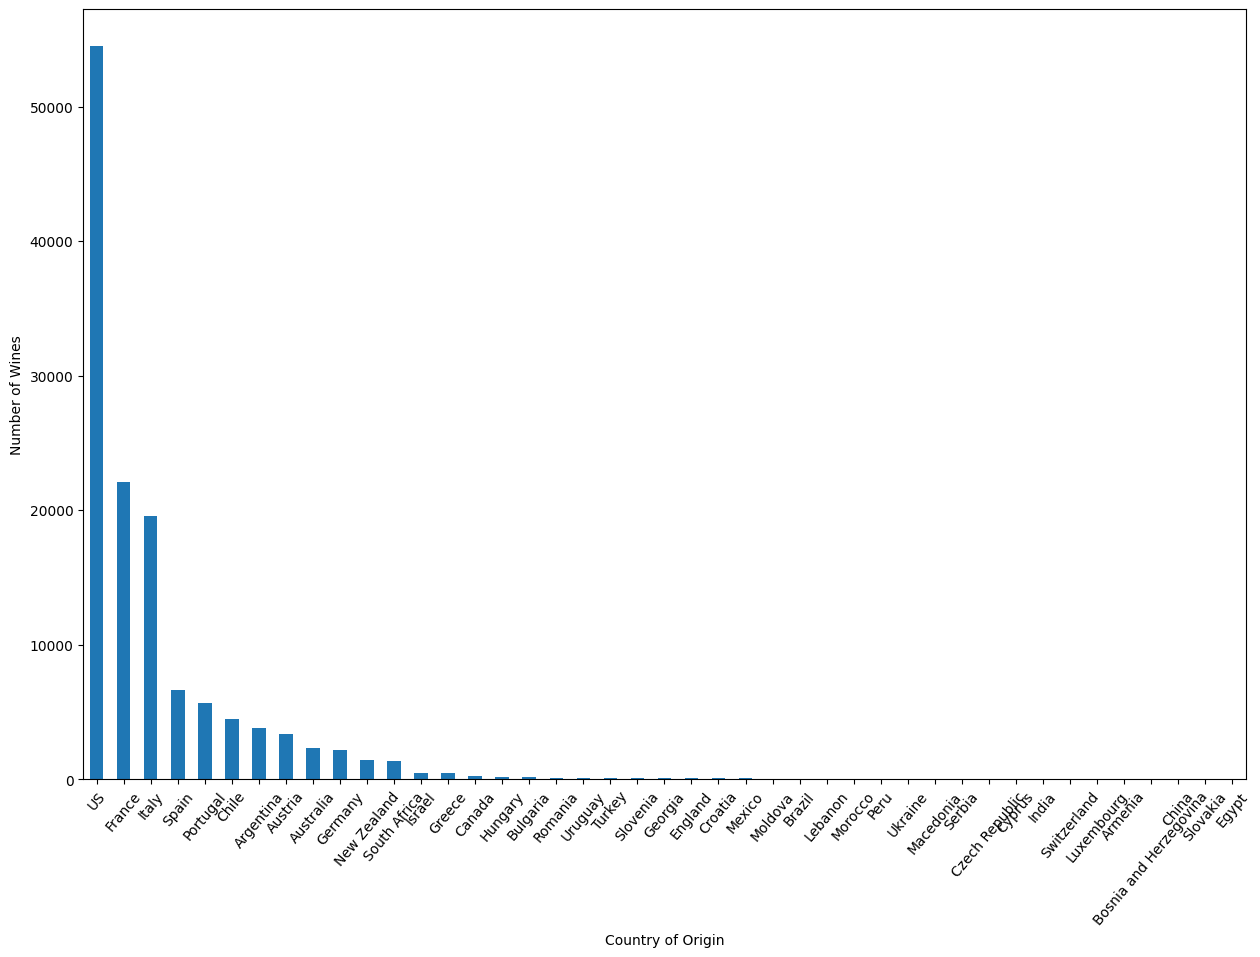

In [7]:
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

### **Examine the data**

Let's now take a look at the plot of all 44 countries by its highes-rated wine, using hte same plotting technique as above.

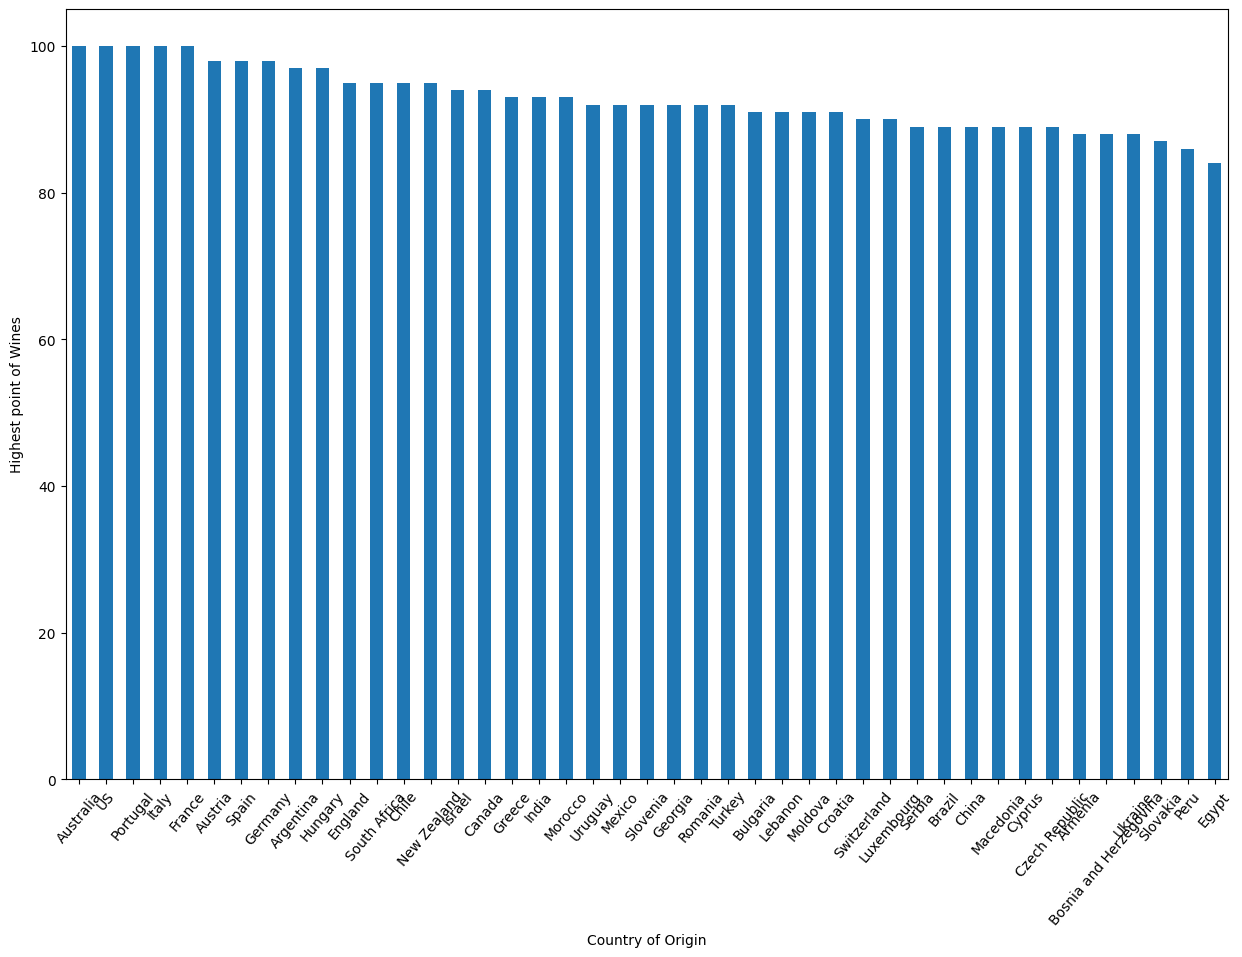

In [8]:
plt.figure(figsize=(15,10))
country.points.max().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Highest point of Wines")
plt.show()

## **Setting up a Basic Word CLoud in Python**

### **Getting Started**

A **word cloud** is a technique to show which words are the most frequent in the given text.

`?WordCloud`

### **Start with a simple input**

So let's start with a simple example: using the first observation description as the input for the word cloud. The three steps are:
- Extract the review (text document)
- Create and generate a wordcloud image
- Display the cloud using matplotlib

Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.


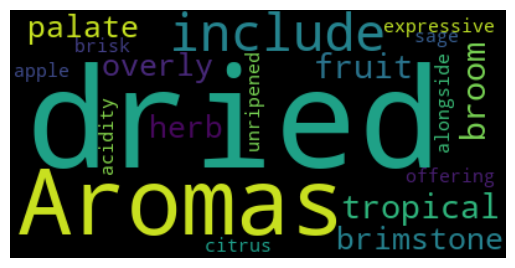

In [9]:
# Start with one review
text = df.description[0]
print(text)

# Create and generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### **Changing optional word cloud arguments**

Now, change some optional arguments of the word cloud like `max_font_size`, `max_word`, and `background_color`.

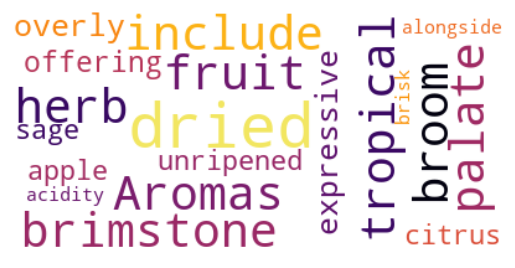

In [10]:
# lower max_font_size, change the maximum number of words and lighten the background
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white', colormap='inferno').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
# Save the wordcloud image in the img folder
wordcloud.to_file('img/first_review.png')

### **Combining data**

So now you'll combine all wine reviews into one big text and create a big fat cloud to see which characteristics are most common in thse wines.

In [12]:
text = " ".join([review for review in df.description])
print(f"There are {len(text.split()):,} words in the combination of all review")

There are 5,248,179 words in the combination of all review


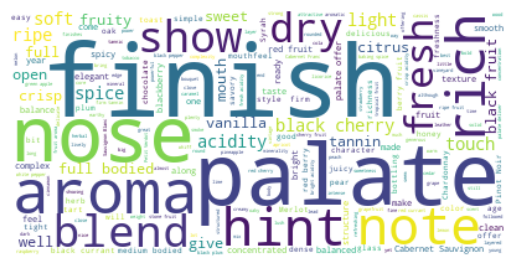

In [13]:
# Create a stopword list
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a wordcloud image
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### **Word cloud visualization in Python**

Now, let's pour these words into a cup (or even a bottle) of wine!

In order to create a shape for yur word cloud, first you need to find a PNG file to become the mask.

Not all mask images have the same format resulting in different outcomes, hence making the WordCloud function not working properly. To make sure that your mask works, let's take a look at in the numpy array form:

In [14]:
wine_mask = np.array(Image.open("img/wine_mask.png"))

(-0.5, 511.5, 511.5, -0.5)

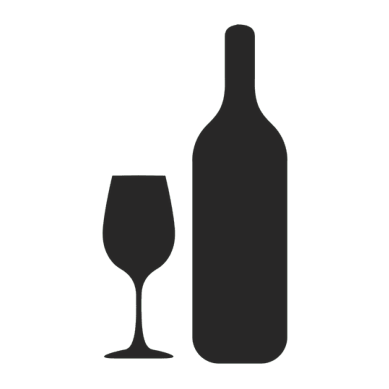

In [15]:
# Show the image
plt.imshow(wine_mask)
plt.axis("off")

The way the masking functions workds is that it requires all white part of the mask should be **255** not 0 (integer type). This value represents the "intensity" of the pixel. Values of **255** are pure white, where as values of 1 are black. Here, you can use the provided function belo to transform your mask if your mask has the **SAME FORMAT** as above. Notice if you have a mask that the background is not 0, but 1 or 2, adjust the function to match your mask.

In [16]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [17]:
# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0], wine_mask.shape[1]), np.int32)

#for i in range(wine_mask.shape[0]):
#    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

With the right mask, you can start making the word cloud with your selected shape. Notice in the `WordCloud` function there is a mask argument that akes in the transformed mask that you created above. The `countour_width` and `contour_color` are, as their name suggests, arguments to adjust the outline characteristics of he cloud.

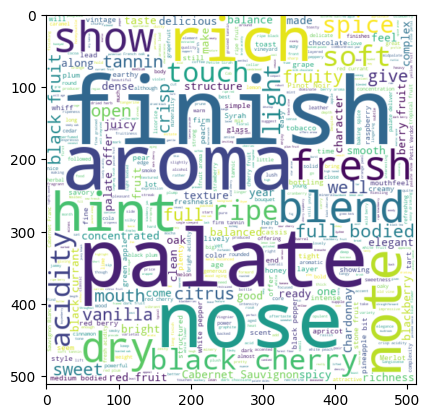

In [18]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=wine_mask, stopwords=stopwords, contour_width=3, contour_color='crimson')

# Generate a wordcloud
wc.generate(text)

plt.imshow(wc, interpolation='bilinear')

## **Creating a Word CLoud Following a Color Pattern**

For now, five countries should be enough.

To get all reviews for each country, you can concatenate all of the reviews using the `"".join(list)` syntax, which joins all elements in a list, separating them by whitespace.

In [19]:
top_countries = df.groupby('country').size().sort_values(ascending=False).head()
top_countries

country
US          54504
France      22093
Italy       19540
Spain        6645
Portugal     5691
dtype: int64

In [20]:
# Join all reviews for each country
usa = " ".join([review for review in df.query("country == 'US'").description])
fra = " ".join([review for review in df.query("country == 'France'").description])
ita = " ".join([review for review in df.query("country == 'Italy'").description])
spa = " ".join([review for review in df.query("country == 'Spain'").description])
por = " ".join([review for review in df.query("country == 'Portugal'").description])

Then, you can create the word cloud as outlined above. You can combine the two steps of creating and generating into one as below. The color mapping is done right before you plot the cloud using the `ImageColorGenerator` function from the WordCloud library.

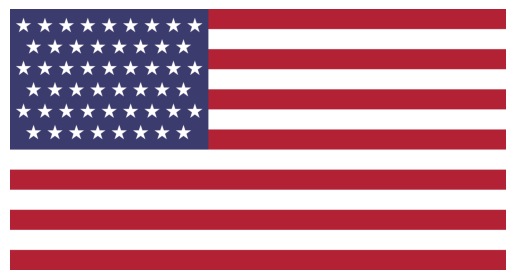

In [21]:
# Generate a wordcloud image
usa_mask = np.array(Image.open("img/us.png"))

plt.axis("off")
plt.imshow(usa_mask)

(-0.5, 2559.5, 1346.5, -0.5)

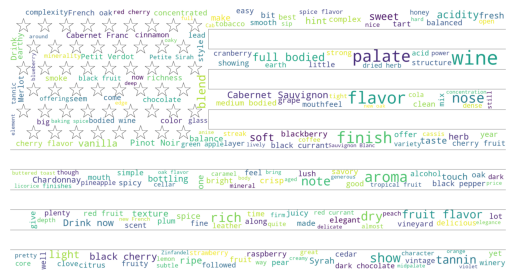

In [22]:
# Generate a word cloud image
wordcloud_usa = WordCloud(stopwords=STOPWORDS, background_color="white", mask=usa_mask, contour_width=0.3).generate(usa)

# Visualize, pre ImageColor
plt.imshow(wordcloud_usa)
plt.axis("off")

(-0.5, 2559.5, 1346.5, -0.5)

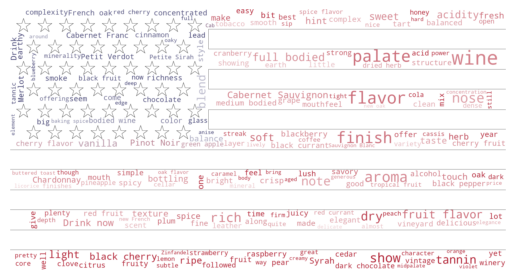

In [23]:
# Create coloring from image
image_colors = ImageColorGenerator(usa_mask)
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

Looks good! Now let's repeat with a review from France.

(-0.5, 734.5, 489.5, -0.5)

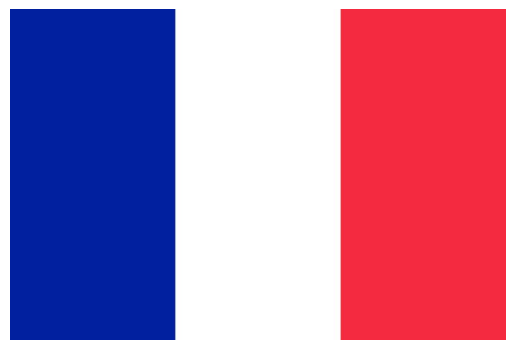

In [24]:
# Import the image for france
france_mask = np.array(Image.open("img/france.jpg"))
plt.imshow(france_mask)
plt.axis("off")

(-0.5, 734.5, 489.5, -0.5)

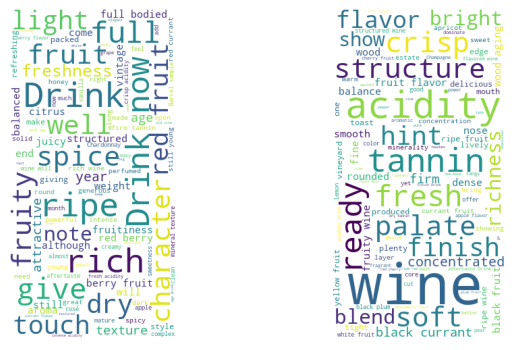

In [25]:
# Create a new wordcloud with france data
wordcloud_france = WordCloud(stopwords=STOPWORDS, mask=france_mask, background_color="white", mode='RGBA').generate(fra)
plt.imshow(wordcloud_france)
plt.axis("off")

(-0.5, 734.5, 489.5, -0.5)

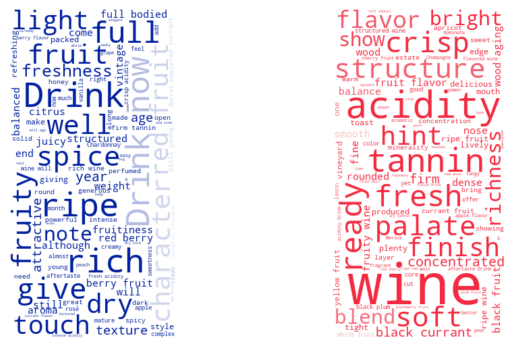

In [26]:
# Recolor the france image
france_colors = ImageColorGenerator(france_mask)
plt.imshow(wordcloud_france.recolor(color_func=france_colors), interpolation='bilinear')
plt.axis("off")

Replicate with Italy

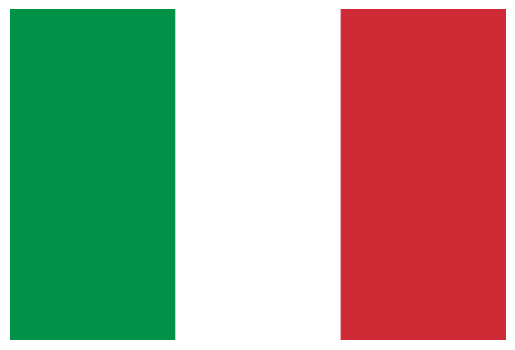

In [38]:
italy_mask = np.array(Image.open("img/italy.png")) # Import the image and convert it to array
plt.imshow(italy_mask)  # Show the image
plt.axis("off")         # Turn-off the axis
plt.show()              # Show the image

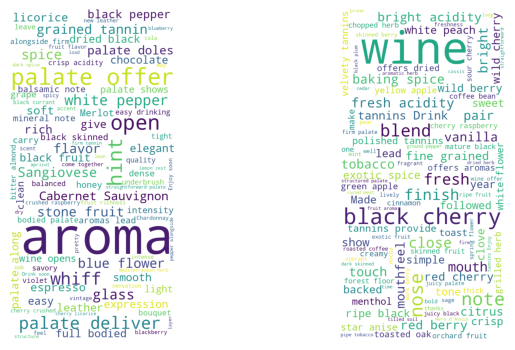

In [39]:
# Create a wordcloud with Italy text
wordcloud_italy = WordCloud(stopwords=STOPWORDS, background_color="white", mask=italy_mask).generate(ita)
plt.imshow(wordcloud_italy) # Show the italy wordcloud
plt.axis("off")             # Turn-off the italy image
plt.show()                  # Show the image

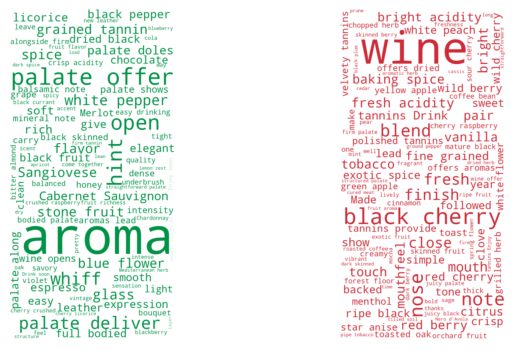

In [41]:
# Use the italy mask for the wordcloud
italy_colors = ImageColorGenerator(italy_mask)                                          # Generate the colors based on the `italy_mask`
plt.imshow(wordcloud_italy.recolor(color_func=italy_colors), interpolation="bilinear")  # Show the recolored wordcloud
plt.axis("off")                                                                         # Turn-off the axis
plt.show()                                                                              # Show the image

Replicate it with spain

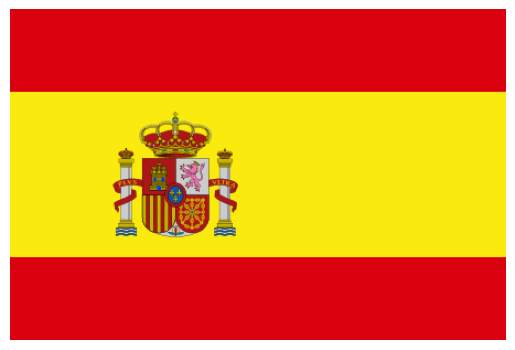

In [43]:
spain_mask = np.array(Image.open("img/spain.png"))  # Import the spain image and save it as array
plt.imshow(spain_mask)                              # Show the image
plt.axis("off")                                     # Turn-off the axis
plt.show()                                          # Show the image

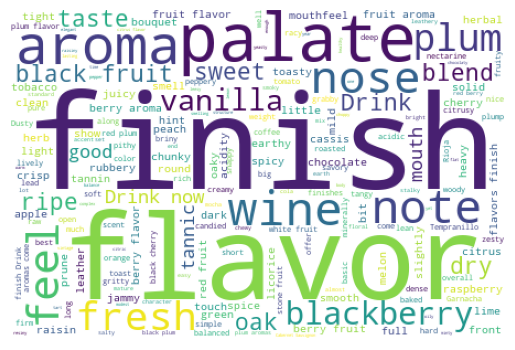

In [46]:
# Create a the spain wordcloud
wordcloud_spain = WordCloud(stopwords=STOPWORDS, background_color="white", mask=spain_mask).generate(spa)
plt.imshow(wordcloud_spain) # Show the spain wordcloud
plt.axis("off")             # Turn-off the axis
plt.show()                  # Show the image

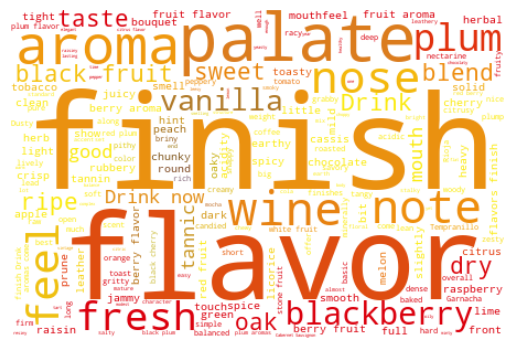

In [47]:
# Create the spain colors
spain_colors = ImageColorGenerator(spain_mask)
plt.imshow(wordcloud_spain.recolor(color_func=spain_colors), interpolation='bilinear')  # Recolor the wordcloud and show
plt.axis("off")                                                                         # Turn-off the axis
plt.show()                                                                              # Show the image

Finally, replicate it with Portugal.

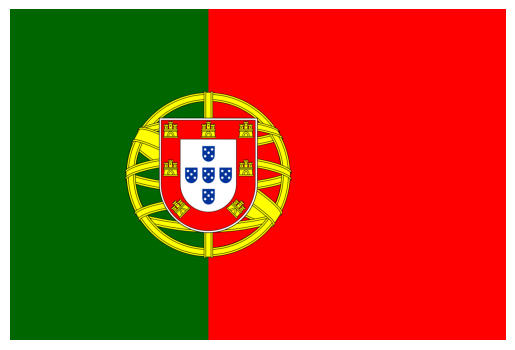

In [48]:
portugal_mask = np.array(Image.open("img/portugal.png")) # Import the portugal image and save it as array
plt.imshow(portugal_mask)   # Show the imported image
plt.axis("off")             # Turn-off the axis
plt.show()                  # Show the image

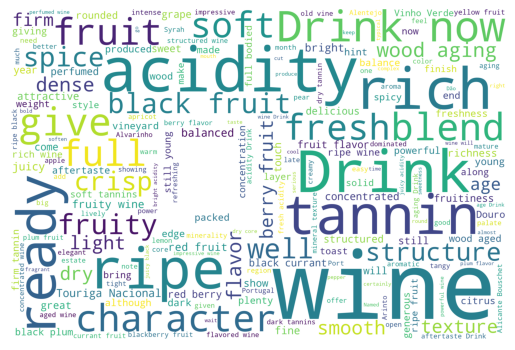

In [50]:
# Generate the portugal wordcloud
wordcloud_portugal = WordCloud(stopwords=STOPWORDS, background_color='white', mask=portugal_mask).generate(por)
plt.imshow(wordcloud_portugal)  # Show the wordcloud
plt.axis("off")                 # Turn-off the axis
plt.show()                      # Show the wordcloud image

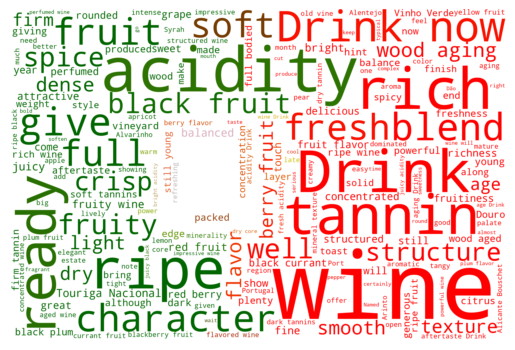

In [53]:
# Generate the portugal colors
portugal_colors = ImageColorGenerator(portugal_mask)
plt.imshow(wordcloud_portugal.recolor(color_func=portugal_colors), interpolation='bilinear')    # Recolor the wordcloud
plt.axis("off")                                                                                 # Turn-off the axis
plt.show()                                                                                      # Show the final

## **How to Interpret Word Clouds**

So, we've noew seen several word cloud examples and how to create them in Python. However, it's worth explorin how to interpret these data visualizations. Generally, the size of each word in the cloud represents its **frequency** or **importance** in the text. Typically, the more frequently a word appears in the text, the larger it will appear in the word cloud.

There are several things to bear in mind when inerpreting word clouds:

- **Pay attention to the size of the words**: As mentioned, the size of each word in he cloud corresponds to its frequency or importance in the text. Therefore, larger words are generally more significant in hte overall mesage of the text.
- **Look for patterns**: Are there any groups of words that appear together frequently? This can indicate a **theme** or **topic** that is important in the text.
- **Consider the text**: Remember that the word cloud only represents the words that appear in the text, and doesn't provide any information about their meaning o how they are being used. Therefore it's important to think about the context of the text and the specific meanings of the words being used.
- **Be wary of outliers**: Sometimes, a word may appear very large in the word cloud simply because it appears frequently, even if it's not particularly meaningful or relevant tot the overall message of the text. Keep an eye out for such outliers and try to focus on the words and patterns that are most significant.

Overall, a word cloud can be a useful tool for quickly visualizing the key themes and ideas in a text. However, it's important to keep in mind that it is just one tool among many for analyzing text data, and should be used in conjunction with other methods for deeper analysis and understanding.